# Deformation of the WebODM output using the RTK track along the waterline
### I    RTK track vs different preset calibration models WebODM
### II   Polynomials of the waterline tracks
### III  Deformation of the cloud
### IIII Stretching the cloud for the boundary conditions

Sten Schurer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from tabulate import tabulate

## -------------------------------------------------------------------------------------------------------------------------------
### I   RTK track vs different preset calibration models WebODM

#### Load the RTK line

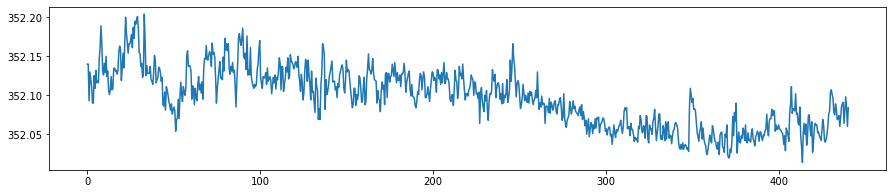

In [2]:
rtk_track = pd.read_excel(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\RTK\17-12', 'waterline_height_XYZ.xls'))

plt.figure(figsize = (15, 3))
xaxis = np.linspace(0, 440, 897) #the track is 438.51 metres in length
plt.plot(xaxis, rtk_track['W'], label='real');

#### Load the track from the calibrated WebODM clouds extracted by rasterio

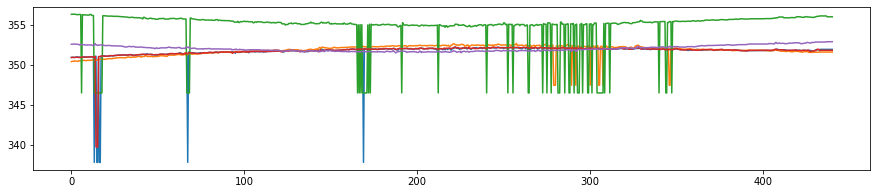

In [3]:
non_calibrated = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\Cloud_compare\CC\Non_Calibrated', 'Luangwa_non_calibrated_waterline.csv'))
calibrated     = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\Cloud_compare\CC\Calibrated', 'Luangwa_calibrated_waterline.csv'))
brown          = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\Cloud_compare\CC\Brown', 'Luangwa_brown_waterline.csv'))
brown_no_cal   = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\Cloud_compare\CC\Brown', 'Luangwa_brown_no_cal_waterline.csv'))
brown_brown    = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\Cloud_compare\CC\Brown_Brown', 'Brown_Brown_waterline_track.csv'))

plt.figure(figsize = (15, 3))
plt.plot(xaxis, brown_no_cal);
plt.plot(xaxis, brown)
plt.plot(xaxis, non_calibrated)
plt.plot(xaxis, brown_brown)
plt.plot(xaxis, calibrated);

#### Get rid of the low values

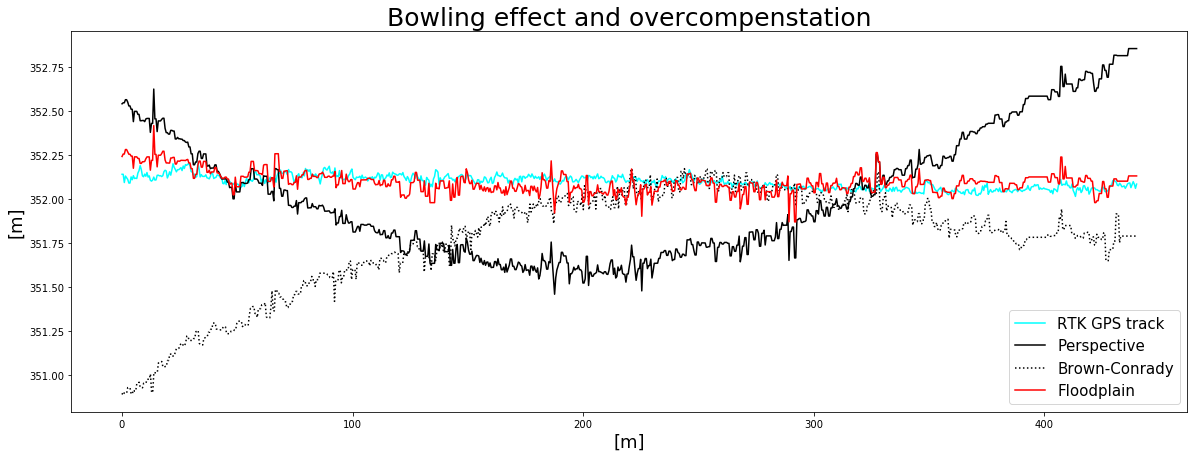

In [4]:
#combine the RTK track with the datasets and delete all lines with low values
# Non_calibrated
nc      = pd.concat([rtk_track, non_calibrated], axis=1, sort=False)
noncal  = nc.loc[nc['Z'] > 349]
xnc     = np.linspace(0, 440, len(noncal))

# Calibrated
cal     = pd.concat([rtk_track, calibrated], axis=1, sort=False)
call    = cal.loc[cal['Z'] > 349]
xcal    = np.linspace(0, 440, len(call))

# Brown perspective
bp      = pd.concat([rtk_track, brown], axis=1, sort=False)
brownp  = bp.loc[bp['Z'] > 349]
xbp     = np.linspace(0, 440, len(brownp))

# Brown not calibrated
bnc     = pd.concat([rtk_track, brown_no_cal], axis=1, sort=False)
brownnc = bnc.loc[bnc['Z'] > 349]
xbnc    = np.linspace(0, 440, len(brownnc))

# Brown Brown
bb      = pd.concat([rtk_track, brown_brown], axis=1, sort=False)
bbrown  = bb.loc[bb['Z'] > 349]
xbb     = np.linspace(0, 440, len(bbrown))


#get the right index
noncal.index  = np.arange(noncal.shape[0])
call.index   = np.arange(call.shape[0])
brownp.index = np.arange(brownp.shape[0])
brownnc.index = np.arange(brownnc.shape[0]) 
bbrown.index = np.arange(bbrown.shape[0])

#plot the outcome
fig = plt.figure(figsize = (20, 7))

#plot the rtk track
plt.plot(xaxis, rtk_track['W'], color = 'cyan', label='RTK GPS track')

#plot the calibration lines
# plt.plot(noncal['Z'],  label = 'Not calibrated')
plt.plot(xcal, call['Z'], color = 'k',   label ='Perspective')
plt.plot(xbb, bbrown['Z'],  color = 'k', linestyle= ':', label = 'Brown-Conrady')
# plt.plot(xbp, brownp['Z'], color = 'g',  label = 'Brown-Conrady and Perspective')
# plt.plot(xbnc, brownnc['Z'], color = 'y', label = 'Brown-Conrady not calibrated')

plt.xlabel('[m]', fontsize=18)
plt.ylabel('[m]', fontsize=18)
plt.title('Bowling effect and overcompenstation', fontsize=25)

#plot the outcome of this notebook
output = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\Cloud_compare\CC\Calibrated', 'Waterline_29_2.csv'))
out   = np.linspace(0, 440, len(output))
plt.plot(out, output, color = 'r', label='Floodplain')
plt.legend(fontsize=15)

# fig.savefig(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\Cloud_compare\Cloud_deformation3.png')

#### Pearsons R

In [5]:
#Correlation 
import scipy.stats

C  = scipy.stats.pearsonr(call['W'], call['Z'])
P  = scipy.stats.pearsonr(brownp['W'], brownp['Z'])
NC = scipy.stats.pearsonr(brownnc['W'], brownnc['Z'])
N  = scipy.stats.pearsonr(bbrown['W'], bbrown['Z'])

print('Callibrated:', C)
print('Brown_persepctive:', P)
print('Brown_not_calibrated:', NC)
print('Brown_brown:', N)

Callibrated: (-0.35070605091846524, 2.349971187267312e-27)
Brown_persepctive: (-0.3090751325247935, 4.578982915005643e-21)
Brown_not_calibrated: (-0.43345207784308665, 4.568674768576849e-42)
Brown_brown: (-0.4366962884387926, 6.315395279142141e-43)


#### Absolute error

In [6]:
dC  = abs(call['W']    - call['Z'])
dP  = abs(brownp['W']  - brownp['Z'])
dNC = abs(brownnc['W'] - brownnc['Z'])
dN  = abs(bbrown['W']  - bbrown['Z'])

meanC = dC.mean()
meanP = dP.mean()
meanNC = dNC.mean()
meanN  = dN.mean()

print('Callibrated:', meanC)
print('Brown_persepctive:', meanP)
print('Brown_not_calibrated:', meanNC)
print('Brown_brown:', meanN)

Callibrated: 0.3329972439686514
Brown_persepctive: 0.43541636568851494
Brown_not_calibrated: 0.3392241573029975
Brown_brown: 0.335524529887805


## -------------------------------------------------------------------------------------------------------------------------------
### II   Polynomials of the waterline tracks

#### Fit a polynomial through the rtk track

                 X             Y        W
0    200498.394202  8.340838e+06  352.140
1    200498.553444  8.340837e+06  352.140
2    200498.687249  8.340837e+06  352.093
3    200498.919503  8.340836e+06  352.130
4    200499.219344  8.340836e+06  352.120
..             ...           ...      ...
892  200653.774242  8.340428e+06  352.081
893  200653.777008  8.340428e+06  352.098
894  200653.779865  8.340428e+06  352.083
895  200653.785084  8.340428e+06  352.060
896  200653.781671  8.340428e+06  352.084

[897 rows x 3 columns]
[-2.29557618e-04  3.52146713e+02]


<Figure size 1440x504 with 0 Axes>

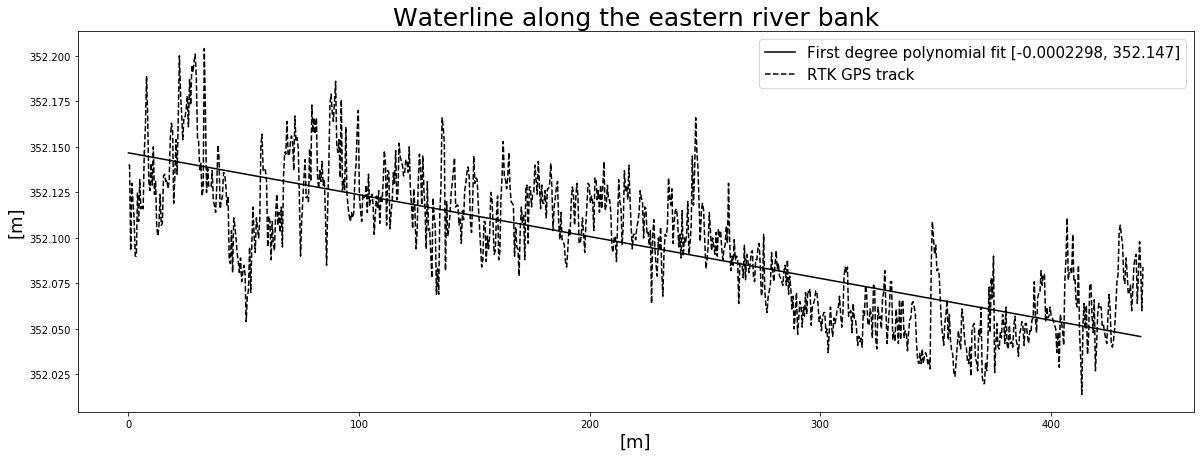

In [7]:
plt.figure(figsize = (20, 7))

print(rtk_track)
x = np.arange(len(rtk_track))
y = rtk_track['W']
px = np.linspace(0, 438.5, 897)
polynomial = np.polyfit(px, y, 1)
print(polynomial)

#polynomial calculated above
polynomial = [-0.000229809, 352.146713]

#plot the polynomial and the track
fig = plt.figure(figsize = (20, 7))
ynew = np.poly1d(polynomial)
xax = np.linspace(0, 439, 440)
poly_track_rtk_Z = pd.DataFrame(ynew(xax))

plt.plot(xax, poly_track_rtk_Z, 'k', xaxis, y, 'k--')
plt.title('Waterline along the eastern river bank', fontsize = 25)
plt.xlabel('[m]', fontsize=18)
plt.ylabel('[m]', fontsize=18)
plt.legend(['First degree polynomial fit [-0.0002298, 352.147]', 'RTK GPS track'], fontsize= 15)
#plt.savefig(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\Report\Figures\Finished figures\Waterline along the eastern river bank.png');

#### Polynomial function for the calibrated clouds

In [8]:
def poly(x, y, nbr):
    xx = np.arange(len(x))
    polynomial = np.polyfit(xx, y, nbr)
    polynomial2 = [polynomial[0], polynomial[1], polynomial[2]]
    return(polynomial2)

poly_call    = poly(call['Z'], call['Z'], 2)
poly_brownp  = poly(brownp['Z'], brownp['Z'], 2)
poly_brownnc = poly(brownnc['Z'], brownnc['Z'], 2)
poly_bbrown  = poly(bbrown['Z'], bbrown['Z'], 2)

print(poly_brownp)
print(poly_call)
print(poly_brownnc)
print(poly_bbrown)


[-7.534101902926007e-06, 0.0077280474449879875, 350.3956526216456]
[5.482647441527526e-06, -0.004401621318881213, 352.5224615775621]
[-3.5538896376257574e-06, 0.003941720193294966, 350.945191947659]
[-3.703206860123488e-06, 0.0040988482748207135, 350.9204403848899]


#### make a dataset of the polynomial (with the length of the rtk track)

Text(0, 0.5, '[m]')

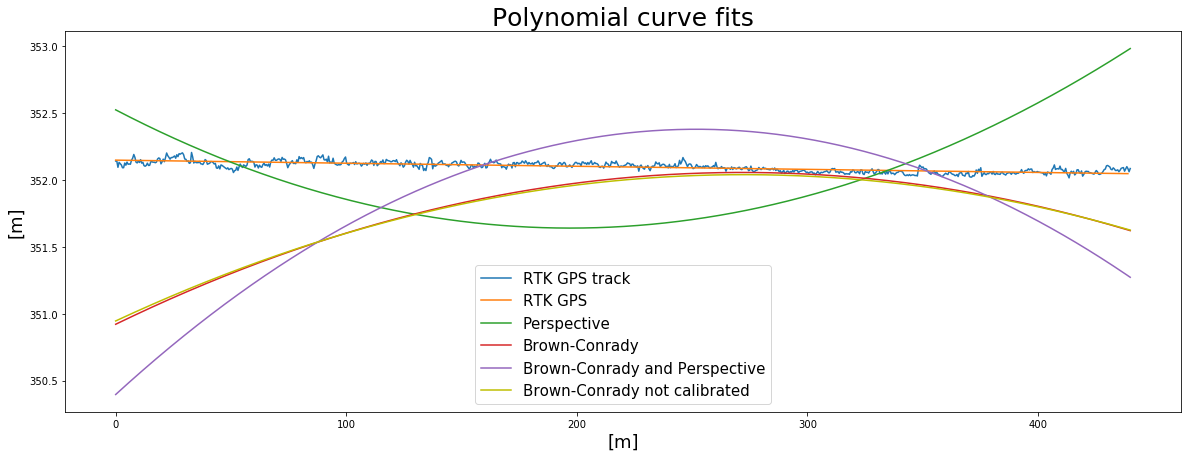

In [9]:
def line(poly):
    xneww = np.arange(897)
    yneww = np.poly1d(poly)
    return(yneww(xneww))

poly_track_call     = pd.DataFrame(line(poly_call))
poly_track_brownp   = pd.DataFrame(line(poly_brownp))
poly_track_brownnc  = pd.DataFrame(line(poly_brownnc))
poly_track_bbrown   = pd.DataFrame(line(poly_bbrown))

def dataset(pl):
    call_data          = pd.concat([rtk_track, pl], axis=1, sort=False)
    call_data.columns  = ('X', 'Y', 'rtk_Z', 'poly_Z')
    return(call_data)

data_rtk     = dataset(poly_track_rtk_Z)
data_call    = dataset(poly_track_call)
data_brownp  = dataset(poly_track_brownp)
data_brownnc = dataset(poly_track_brownnc)
data_bbrown  = dataset(poly_track_bbrown)

fig = plt.figure(figsize = (20, 7))

plt.plot(xaxis, rtk_track['W'], label = 'RTK GPS track')
plt.plot(xax, poly_track_rtk_Z, label = 'RTK GPS')
plt.plot(xaxis, data_call['poly_Z'], label = 'Perspective')
plt.plot(xaxis, data_bbrown['poly_Z'], label = 'Brown-Conrady')
plt.plot(xaxis, data_brownp['poly_Z'], label = 'Brown-Conrady and Perspective')
plt.plot(xaxis, data_brownnc['poly_Z'], 'y', label = 'Brown-Conrady not calibrated')
plt.legend(fontsize = 15)
plt.title('Polynomial curve fits', fontsize=25)
plt.xlabel('[m]', fontsize=18)
plt.ylabel('[m]', fontsize=18)
# plt.savefig(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\Cloud_compare\Cloud_deformation_polynomials.png');

#### calculate the absolute errror of the polynomial

In [10]:
def error(data):
    absolute  = abs(data['rtk_Z'] - data['poly_Z'])
    mean = absolute.mean()
    return(mean)

abs_rtk     = error(data_rtk)
abs_call    = error(data_call)
abs_brownp  = error(data_brownp)
abs_brownnc = error(data_brownnc)
abs_bbrown  = error(data_bbrown)

table = [['RTK GPS track', abs_rtk], ['Perspective', abs_call], ['Brown-Conrady', abs_bbrown], ['Brown-Conrady and Perspective', abs_brownp], ['Brown-Conrady non calibrated', abs_brownnc]]
print(tabulate(table, headers=['Method', 'Absolute error']))

Method                           Absolute error
-----------------------------  ----------------
RTK GPS track                         0.0368548
Perspective                           0.325806
Brown-Conrady                         0.33122
Brown-Conrady and Perspective         0.423213
Brown-Conrady non calibrated          0.33687


## --------------------------------------------------------------------------------------------------------------------------------
### II  Deformation of the cloud

#### make a polynomial of the y values

                 X             Y        W
0    200498.394202  8.340838e+06  352.140
1    200498.553444  8.340837e+06  352.140
2    200498.687249  8.340837e+06  352.093
3    200498.919503  8.340836e+06  352.130
4    200499.219344  8.340836e+06  352.120
..             ...           ...      ...
892  200653.774242  8.340428e+06  352.081
893  200653.777008  8.340428e+06  352.098
894  200653.779865  8.340428e+06  352.083
895  200653.785084  8.340428e+06  352.060
896  200653.781671  8.340428e+06  352.084

[897 rows x 3 columns]


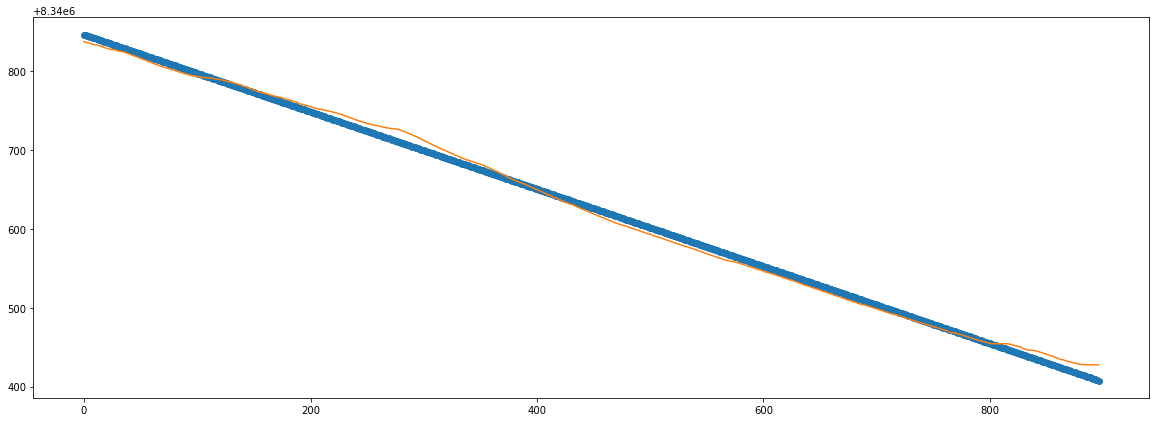

In [11]:
plt.figure(figsize = (20, 7))

#only for calibrated and track it is one column
print(rtk_track)
x = np.arange(len(rtk_track))
y = rtk_track['Y']
polynomial = np.polyfit(x, y, 1)

#polynomials calculated above
polynomialY = [-0.490078585, 8340846.81]

#plot the polynomial and the track
polyy = np.poly1d(polynomialY)
poly_track_rtk_Y = pd.DataFrame(polyy(x))
plt.plot(x, poly_track_rtk_Y, 'o', x, y, '-');

#### extrapolate the rtk track (both Y and Z) 

                 Y           Z
0     8.341004e+06  352.220252
1     8.341003e+06  352.220007
2     8.341003e+06  352.219761
3     8.341002e+06  352.219516
4     8.341002e+06  352.219271
...            ...         ...
1495  8.340222e+06  351.853539
1496  8.340221e+06  351.853293
1497  8.340221e+06  351.853048
1498  8.340220e+06  351.852803
1499  8.340220e+06  351.852557

[1500 rows x 2 columns]


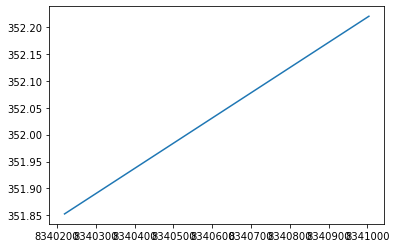

In [12]:
# print(poly_track_rtk_Z)
# print(poly_track_rtk_Y)

length = np.linspace(-320, 1280, 1500)
rtk_yex = pd.DataFrame(polyy(length))

rtk_zex = pd.DataFrame(ynew(length))

rtk_poly_extrapolated  = pd.concat([rtk_yex, rtk_zex], axis=1, sort=False)
rtk_poly_extrapolated.columns = ['Y', 'Z']
print(rtk_poly_extrapolated)
plt.plot(rtk_poly_extrapolated['Y'], rtk_poly_extrapolated['Z']);

#### determine the offset

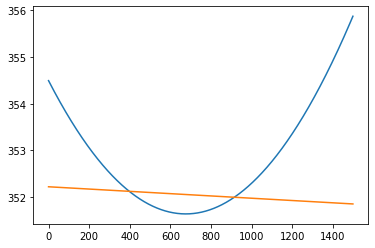

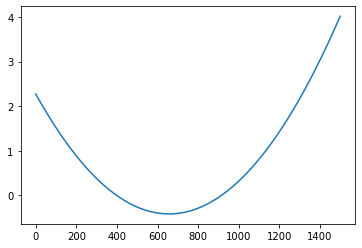

In [13]:
yyy = np.poly1d(poly_call)
rest = yyy(length)
plt.plot(rest)

offset  = (rest - rtk_poly_extrapolated['Z'])
plt.plot(rtk_poly_extrapolated['Z'])

plt.figure()
plt.plot(offset)

#### load the cloud data

In [14]:
clou = pd.DataFrame(pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\TNDTT\Bathymetry', 'ODM_Calibrated.txt'), delimiter=' '))
clou.columns = ['X', 'Y', 'Z', 'a', 'b', 'c']
cloud = clou.drop(['a', 'b', 'c'], axis=1)
print(cloud)

                      X          Y           Z
0         200622.125000  8340921.0  358.279999
1         200625.031250  8340921.0  358.589996
2         200619.781250  8340921.0  357.529999
3         200626.734375  8340920.0  359.049988
4         200616.796875  8340920.0  355.700012
...                 ...        ...         ...
54265346  200814.234375  8340516.5  361.950012
54265347  200812.562500  8340516.0  361.570007
54265348  200815.796875  8340517.5  362.500000
54265349  200818.953125  8340519.0  363.160004
54265350  200815.406250  8340518.0  362.339996

[54265351 rows x 3 columns]


#### make bins

In [15]:
indices = np.digitize(x = cloud['Y'], bins = rtk_poly_extrapolated['Y'], right = False)
print(indices)
print(len(indices))
# np.savetxt(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\TNDTT\River\rtk_poly_extrapolated.txt', rtk_poly_extrapolated)

[158 158 158 ... 930 927 929]
54265351


In [16]:
corr_offset = offset.iloc[indices]
print(corr_offset)

cloud['newZ'] = cloud['Z'] - np.array(corr_offset)
cloud.insert(4, "bin", corr_offset.index) 
clouds = cloud.drop('Z', axis=1)
print(clouds)
# np.savetxt(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\TNDTT\Bathymetry\cloud_deformed_with_bins.txt', clouds)
cccloud = clouds.drop('bin', axis=1)
# np.savetxt(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\TNDTT\Oasis\cloud_deformed_with_bins_XYZ.txt', cccloud)

158    1.132767
158    1.132767
158    1.132767
160    1.120343
160    1.120343
         ...   
932    0.057150
933    0.060601
930    0.050285
927    0.040081
929    0.046871
Name: Z, Length: 54265351, dtype: float64
                      X          Y        newZ  bin
0         200622.125000  8340921.0  357.147232  158
1         200625.031250  8340921.0  357.457229  158
2         200619.781250  8340921.0  356.397232  158
3         200626.734375  8340920.0  357.929644  160
4         200616.796875  8340920.0  354.579669  160
...                 ...        ...         ...  ...
54265346  200814.234375  8340516.5  361.892863  932
54265347  200812.562500  8340516.0  361.509407  933
54265348  200815.796875  8340517.5  362.449715  930
54265349  200818.953125  8340519.0  363.119923  927
54265350  200815.406250  8340518.0  362.293126  929

[54265351 rows x 4 columns]


In [17]:
bin1 = clouds.loc[clouds['bin'] == 1000]
print(bin1)
# np.savetxt(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\TNDTT\Bathymetry\bin1.txt', bin1)

                      X          Y        newZ   bin
14232     200346.296875  8340481.0  358.279714  1000
17101     200828.343750  8340481.0  373.319722  1000
17109     200796.046875  8340481.0  362.149709  1000
17128     200832.453125  8340481.0  373.479695  1000
19410     200359.656250  8340481.0  363.549703  1000
...                 ...        ...         ...   ...
54160976  200797.515625  8340481.0  361.929708  1000
54160977  200797.718750  8340481.0  361.909719  1000
54161004  200799.265625  8340481.0  362.149709  1000
54161005  200799.984375  8340481.0  362.149709  1000
54161011  200799.984375  8340481.0  362.179708  1000

[58959 rows x 4 columns]


#### check sections

In [18]:
x1 = 200422.83002
x2 = 200596.790001
x3 = 200349.679993
x4 = 200478.8125

y1 = 8340865.619995
y2 = 8340264.92004
y3 = 8340868.5
y4 = 8340272.0

z1 = 354
z2 = 353
z3 = 354
z4 = 353

x1_coord = pd.DataFrame(np.linspace(x1, x2, 1000))
y1_coord = pd.DataFrame(np.linspace(y1, y2, 1000))
z1_coord = pd.DataFrame(np.linspace(z1, z2, 1000))

x2_coord = pd.DataFrame(np.linspace(x3, x4, 1000))
y2_coord = pd.DataFrame(np.linspace(y3, y4, 1000))
z2_coord = pd.DataFrame(np.linspace(z3, z4, 1000))

line1  = pd.concat([x1_coord, y1_coord, z1_coord], axis=1, sort=False)
line2  = pd.concat([x2_coord, y2_coord, z2_coord], axis=1, sort=False)
line1.columns = (['X', 'Y', 'Z'])
line2.columns = (['X', 'Y', 'Z'])

section1 = line1.drop('Z', axis=1)
section2 = line2.drop('Z', axis=1)

# np.savetxt('control_section_1.txt', section1)
# np.savetxt('control_section_2.txt', section2)

#### Check the slope of the sections

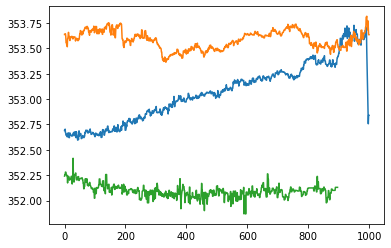

In [19]:
S1 = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\WebODM\output_with_calibration', 'control_section_1_from_cloud_rasterio.csv'))
S2 = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\WebODM\output_with_calibration', 'control_section_2_from_cloud_rasterio.csv'))
Srtk = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\WebODM\output_with_calibration', 'rtk_section_from_cloud_rasterio.csv'))

section1  = S1.loc[S1['Z'] > 350]
section2  = S2.loc[S2['Z'] > 350]

plt.plot(section1)
plt.plot(section2)
plt.plot(Srtk);

## --------------------------------------------------------------------------------------------------------------------------------
### III Stretching the cloud for the boundary conditions

#### Stretching the DEM (BOTTOM)

In [20]:
bottom = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\TNDTT', 'Continuation_South.txt'), sep=' ', header=0)
bottom.columns = ('X', 'Y', 'Z', 'ZZ')
bottom = bottom.drop('ZZ', axis = 1)
bx = np.zeros(118)
by = np.zeros(118)
bz = np.zeros(118)

print(bottom)

for i in range(118): #118 gives about 4.4 km, that is half of the adaptation length
    bx            = bottom['X'].iloc[-1786:] + (8 * 1)           # the factor with 'by' is 3.6
    by            = bottom['Y'].iloc[-1786:] - (36 * 1)
    bz            = bottom['Z'].iloc[-1786:] - (0.008581068 * 1) # the slope over 36.85 meters
    new           = pd.concat([bx, by, bz], axis = 1, sort=False)
    bottom        = pd.concat([bottom, new], axis = 0, sort=False)
    bottom.index  = np.arange(bottom.shape[0])

print(bottom['Z'].min())
print(bottom[210747:])
# np.savetxt(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\TNDTT\Continuation_South_total.txt', bottom)

                X          Y           Z
0     200338.3125  8340325.0  360.425232
1     200339.3125  8340325.0  360.065247
2     200340.3125  8340325.0  360.103241
3     200341.3125  8340325.0  360.415955
4     200342.3125  8340325.0  360.510681
...           ...        ...         ...
1781  200820.3125  8340369.0  378.056091
1782  200821.3125  8340369.0  379.267761
1783  200822.3125  8340369.0  380.479401
1784  200823.3125  8340369.0  380.669739
1785  200824.3125  8340369.0  380.036987

[1786 rows x 3 columns]
348.8714976959985
                  X          Y           Z
210747  201760.3125  8336157.0  379.033002
210748  201282.3125  8336077.0  359.412666
210749  201283.3125  8336077.0  359.052681
210750  201284.3125  8336077.0  359.090675
210751  201285.3125  8336077.0  359.403389
...             ...        ...         ...
212529  201764.3125  8336121.0  377.043525
212530  201765.3125  8336121.0  378.255195
212531  201766.3125  8336121.0  379.466835
212532  201767.3125  8336121.0  379

#### Stretch the DEM (UPPER) 

In [21]:
upper = pd.read_csv(os.path.join(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\TNDTT', 'Continuation_North.txt'), sep=' ', header=0)
upper.columns = ('X', 'Y', 'Z', 'ZZ')
upper = upper.drop('ZZ', axis = 1)
bx = np.zeros(118)
by = np.zeros(118)
bz = np.zeros(118)


print(upper)

for i in range(118): #118 gives about 3.845 km, that is half of the backwater curve / adaptation length
    bx            = upper['X'].iloc[-1252:] - (8 * 1)       # the factor with by is 3.6
    by            = upper['Y'].iloc[-1252:] + (36 * 1)
    bz            = upper['Z'].iloc[-1252:] + (0.008581068 * 1) # the slope over 36.85 meters is 0.008581068
    new           = pd.concat([bx, by, bz], axis = 1, sort=False)
    upper         = pd.concat([upper, new], axis = 0, sort=False)
    upper.index   = np.arange(upper.shape[0])

print(upper)
# np.savetxt(r'C:\Users\SSchurer\Documents\TU_Delft\Thesis\TNDTT\Continuation_North_total.txt', upper)

                X          Y           Z
0     200551.3125  8340878.0  351.052216
1     200552.3125  8340878.0  350.914062
2     200552.3125  8340879.0  351.146881
3     200553.3125  8340879.0  351.008759
4     200554.3125  8340879.0  350.888763
...           ...        ...         ...
1247  200553.3125  8340880.0  351.241547
1248  200554.3125  8340880.0  351.103424
1249  200555.3125  8340881.0  351.198120
1250  200556.3125  8340881.0  351.072937
1251  200557.3125  8340881.0  350.958130

[1252 rows x 3 columns]
                  X          Y           Z
0       200551.3125  8340878.0  351.052216
1       200552.3125  8340878.0  350.914062
2       200552.3125  8340879.0  351.146881
3       200553.3125  8340879.0  351.008759
4       200554.3125  8340879.0  350.888763
...             ...        ...         ...
148983  199609.3125  8345128.0  352.254113
148984  199610.3125  8345128.0  352.115990
148985  199611.3125  8345129.0  352.210686
148986  199612.3125  8345129.0  352.085503
148987  19

#### Delete column 4 created by CC